# 의사결정나무

In [1]:
execfile('setting.py')

## 데이터 구성하기

In [2]:
# 데이터 불러오기
df_raw = pd.read_csv(path2+"유방암.csv", encoding = 'euc-kr')
df_raw.head()

diagnosis  mean_radius  mean_texture  mean_perimeter  mean_area  \
0        음성        15.12         16.68           98.78      716.6   
1        양성        10.80          9.71           68.77      357.6   
2        음성        18.31         18.58          118.60     1041.0   
3        양성        14.92         14.93           96.45      686.9   
4        양성        12.89         13.12           81.89      515.9   

   mean_smoothness  mean_compactness  mean_concavity  mean_concave_points  \
0          0.08876           0.09588         0.07550              0.04079   
1          0.09594           0.05736         0.02531              0.01698   
2          0.08588           0.08468         0.08169              0.05814   
3          0.08098           0.08549         0.05539              0.03221   
4          0.06955           0.03729         0.02260              0.01171   

   mean_symmetry  ...  worst_radius  worst_texture  worst_perimeter  \
0         0.1594  ...         17.77          20.24           117.70   
1         0.1381  ...         11.60          12.02            73.66   
2         0.1621  ...         21.31          26.36           139.20   
3         0.1687  ...         17.18          18.22           112.00   
4         0.1337  ...         13.62          15.54            87.40   

   worst_area  worst_smoothness  worst_compactness  worst_concavity  \
0       989.5           0.14910             0.3331           0.3327   
1       414.0           0.14360             0.1257           0.1047   
2      1410.0           0.12340             0.2445           0.3538   
3       906.6           0.10650             0.2791           0.3151   
4       577.0           0.09616             0.1147           0.1186   

   worst_concave_points  worst_symmetry  worst_fractal_dimension  
0               0.12520          0.3415                  0.09740  
1               0.04603          0.2090                  0.07699  
2               0.15710          0.3206                  0.06938  
3               0.11470          0.2688                  0.08273  
4               0.05366          0.2309                  0.06915  

[5 rows x 31 columns]

In [3]:
def fun_data_layout(v_data):
    print("Data 구조:", v_data.shape)
    print()
    print("변수 : ", v_data.columns)
    print()
    print("info : ", v_data.info())

In [4]:
fun_data_layout(df_raw)

Data 구조: (320, 31)

변수 :  Index(['diagnosis', 'mean_radius', 'mean_texture', 'mean_perimeter',
       'mean_area', 'mean_smoothness', 'mean_compactness', 'mean_concavity',
       'mean_concave_points', 'mean_symmetry', 'mean_fractal_dimension',
       'radius_error', 'texture_error', 'perimeter_error', 'area_error',
       'smoothness_error', 'compactness_error', 'concavity_error',
       'concave_points_error', 'symmetry_error', 'fractal_dimension_error',
       'worst_radius', 'worst_texture', 'worst_perimeter', 'worst_area',
       'worst_smoothness', 'worst_compactness', 'worst_concavity',
       'worst_concave_points', 'worst_symmetry', 'worst_fractal_dimension'],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                320 non-null    object 
 1   mean_radius              32

## 데이터 전처리

### 데이터 결측치 확인

In [5]:
df_raw.isnull().sum(axis = 0)

diagnosis                  0
mean_radius                0
mean_texture               0
mean_perimeter             0
mean_area                  0
mean_smoothness            0
mean_compactness           0
mean_concavity             0
mean_concave_points        0
mean_symmetry              0
mean_fractal_dimension     0
radius_error               0
texture_error              0
perimeter_error            0
area_error                 0
smoothness_error           0
compactness_error          0
concavity_error            0
concave_points_error       0
symmetry_error             0
fractal_dimension_error    0
worst_radius               0
worst_texture              0
worst_perimeter            0
worst_area                 0
worst_smoothness           0
worst_compactness          0
worst_concavity            0
worst_concave_points       0
worst_symmetry             0
worst_fractal_dimension    0
dtype: int64

### 범주형 데이터 replace

In [6]:
df_raw.diagnosis.replace({'음성':0, '양성':1}, inplace=True)

### 데이터 분할

In [7]:
# 설명변수, 목표변수 데이터 구분
df_raw_x = df_raw.drop("diagnosis", axis = 1, inplace = False)
df_raw_y = df_raw["diagnosis"] 

# 데이터 분할 train_test_split(X: 설명변수, Y: 목표변수, test_size = test 데이터 비율)
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(
    df_raw_x, df_raw_y, test_size = 0.4, random_state = 1234) 

print("분할 전 설명변수 데이터 :", df_raw_x.shape)
print("분할 후 설명변수 데이터 :Train", df_train_x.shape, "  Test",df_test_x.shape)

분할 전 설명변수 데이터 : (320, 30)
분할 후 설명변수 데이터 :Train (192, 30)   Test (128, 30)


## 모델 생성

### Default option Model

In [8]:
tree_uncustomized = DecisionTreeClassifier(random_state=1234 )
tree_uncustomized.fit(df_train_x, df_train_y)

# train 데이터 정확도
print("Accuracy on training set: {:.3f}".format(tree_uncustomized.score(df_train_x, df_train_y)))
# test 데이터 정확도
print("Accuracy on test set: {:.3f}".format(tree_uncustomized.score(df_test_x, df_test_y)))

Accuracy on training set: 1.000
Accuracy on test set: 0.883


### max_depth 파라미터 조정

In [9]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# max_depth: 최대 깊이 변경. 1~10
para_depth = [depth for depth in range(1, 11)]

for v_max_depth in para_depth:
    tree = DecisionTreeClassifier(max_depth = v_max_depth, random_state=1234,)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_depth = pd.DataFrame()
df_accuracy_depth["Depth"] = para_depth
df_accuracy_depth["TrainAccuracy"] = train_accuracy
df_accuracy_depth["TestAccuracy"] = test_accuracy

# 모델 정확도 확인
df_accuracy_depth.round(3)

Depth  TrainAccuracy  TestAccuracy
0      1          0.932         0.852
1      2          0.979         0.875
2      3          0.995         0.875
3      4          1.000         0.883
4      5          1.000         0.883
5      6          1.000         0.883
6      7          1.000         0.883
7      8          1.000         0.883
8      9          1.000         0.883
9     10          1.000         0.883

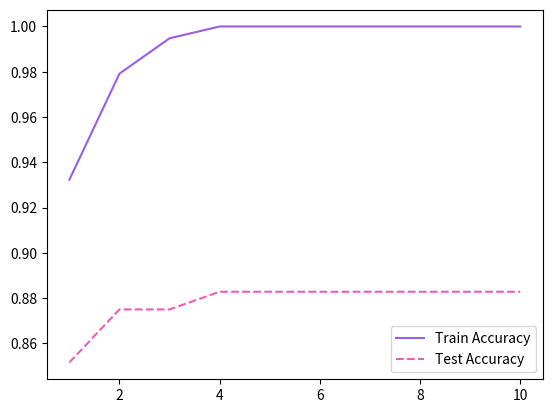

In [10]:
# 모델 정확도 그래프 확인
plt.plot(para_depth, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_depth, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.legend()

#### max_depth = 4 선택

#### Graphviz 확인

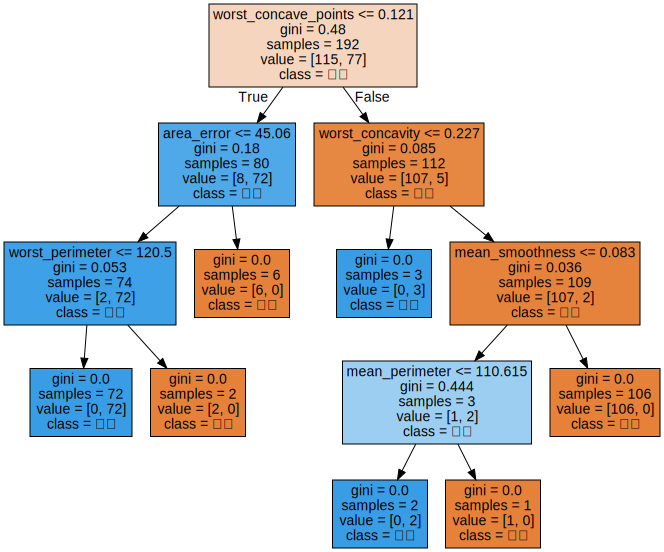

In [25]:
# 변수명 저장
v_feature_name = df_train_x.columns

# 깊이가 4인 모델
tree_low = DecisionTreeClassifier(max_depth = 4, random_state=1234)
tree_low.fit(df_train_x, df_train_y)

# 트리 모델을 tree_low.dot 파일로 저장. (목표변수, 0: Good, 1: Bad)
export_graphviz(tree_low, out_file="tree_low.dot", class_names = ["음성", "양성"], # 목표변수 값이 숫자-> Label 직접 지정
                # class_names = tree_low.classes_,원래 목표변수 값이 법주형 -> 모델 keyword 사용           
                feature_names = v_feature_name, impurity = True, filled = True)
# graphviz를 이용해 트리 모델 시각화
with open("tree_low.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

### @min_samples_split 파라미터 조정

In [26]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# min_samples_split: 분할하기 위한 노드의 최소 샘플 수 
para_split = [n_split * 10 for n_split in range(1, 11)]

for v_min_samples_split in para_split:
    tree = DecisionTreeClassifier(min_samples_split = v_min_samples_split, max_depth=4, random_state=1234)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_split = pd.DataFrame()#### min_samples_split 선택 한 결과 정확도 떨어짐 확인하여 선택하지 않음
df_accuracy_split["MinSamplesSplit"] = para_split
df_accuracy_split["TrainAccuracy"] = train_accuracy
df_accuracy_split["TestAccuracy"] = test_accuracy

# 모델 정확도 확인
df_accuracy_split.round(3)

MinSamplesSplit  TrainAccuracy  TestAccuracy
0               10          0.995         0.875
1               20          0.995         0.875
2               30          0.995         0.875
3               40          0.995         0.875
4               50          0.995         0.875
5               60          0.995         0.875
6               70          0.995         0.875
7               80          0.984         0.867
8               90          0.953         0.844
9              100          0.953         0.844

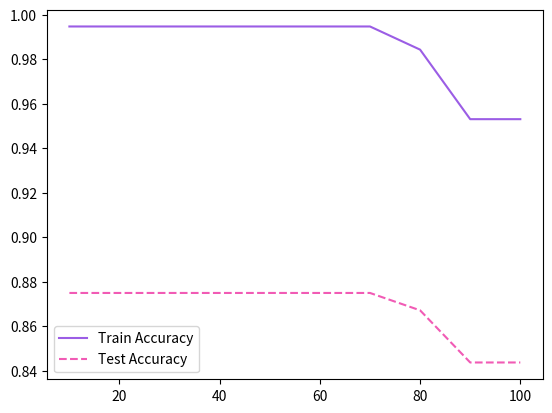

In [14]:
# 정확도를 그래프로 표현
plt.plot(para_split, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_split, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.legend()

#### min_samples_split 선택 한 결과 정확도 떨어짐 확인하여 선택하지 않음

### @min_samples_leaf 파라미터 조정

In [27]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# min_samples_leaf: 잎사귀 노드 최소 자료 수. 2~20
para_leaf = [n_leaf * 20 for n_leaf in range(1, 11)]

for v_min_samples_leaf in para_leaf:
    tree = DecisionTreeClassifier(min_samples_leaf = v_min_samples_leaf, max_depth = 3, random_state=1234)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_leaf = pd.DataFrame()
df_accuracy_leaf["MinSamplesLeaf"] = para_leaf
df_accuracy_leaf["TrainAccuracy"] = train_accuracy
df_accuracy_leaf["TestAccuracy"] = test_accuracy

# 모델 정확도 확인
df_accuracy_leaf.round(3)

MinSamplesLeaf  TrainAccuracy  TestAccuracy
0              20          0.932         0.852
1              40          0.932         0.852
2              60          0.932         0.852
3              80          0.932         0.852
4             100          0.599         0.758
5             120          0.599         0.758
6             140          0.599         0.758
7             160          0.599         0.758
8             180          0.599         0.758
9             200          0.599         0.758

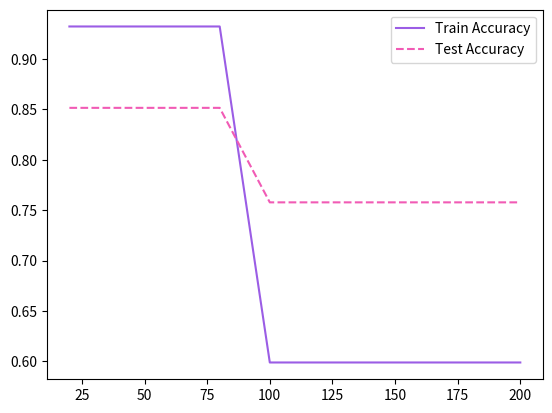

In [17]:
# 모델 정확도 그래프 확인
plt.plot(para_leaf, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_leaf, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.legend()

#### min_samples_leaf 선택 한 결과 정확도 떨어짐 확인하여 선택하지 않음

## 최종 모델 선정 / 시각화

### 최종 모델:분석가 판단에 따라 변경 가능

In [19]:
tree_final = DecisionTreeClassifier(max_depth=3, min_samples_split=10, min_samples_leaf=20, random_state=1234)
tree_final.fit(df_train_x, df_train_y)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=20, min_samples_split=10,
                       random_state=1234)

In [20]:
# 평가
y_pred = tree_final.predict(df_test_x)
print("Accuracy on training set: {:.3f}".format(tree_final.score(df_train_x, df_train_y)))
print("Accuracy: {0:.3f}\n".format(tree_final.score(df_test_x, df_test_y)))
print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))

# 목표변수의 빈도 불균형 : f1 score로 모델 평가 
print(classification_report(df_test_y, y_pred, digits=3))

Accuracy on training set: 0.932
Accuracy: 0.852

Confusion matrix: 
[[86 11]
 [ 8 23]]
              precision    recall  f1-score   support

           0      0.915     0.887     0.901        97
           1      0.676     0.742     0.708        31

    accuracy                          0.852       128
   macro avg      0.796     0.814     0.804       128
weighted avg      0.857     0.852     0.854       128



### 설명변수 중요도


In [21]:
# tree.feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = tree_final.feature_importances_

# df_feature_importance의 테이블을 중요도별로 정렬
df_importance.sort_values("Importance", ascending=False, inplace = True)
df_importance.round(3)

Feature  Importance
27     worst_concave_points       0.954
23               worst_area       0.045
8             mean_symmetry       0.001
0               mean_radius       0.000
16          concavity_error       0.000
28           worst_symmetry       0.000
26          worst_concavity       0.000
25        worst_compactness       0.000
24         worst_smoothness       0.000
22          worst_perimeter       0.000
21            worst_texture       0.000
20             worst_radius       0.000
19  fractal_dimension_error       0.000
18           symmetry_error       0.000
17     concave_points_error       0.000
15        compactness_error       0.000
1              mean_texture       0.000
14         smoothness_error       0.000
13               area_error       0.000
12          perimeter_error       0.000
11            texture_error       0.000
10             radius_error       0.000
9    mean_fractal_dimension       0.000
7       mean_concave_points       0.000
6            mean_concavity       0.000
5          mean_compactness       0.000
4           mean_smoothness       0.000
3                 mean_area       0.000
2            mean_perimeter       0.000
29  worst_fractal_dimension       0.000

Text(0, 0.5, '설명변수')

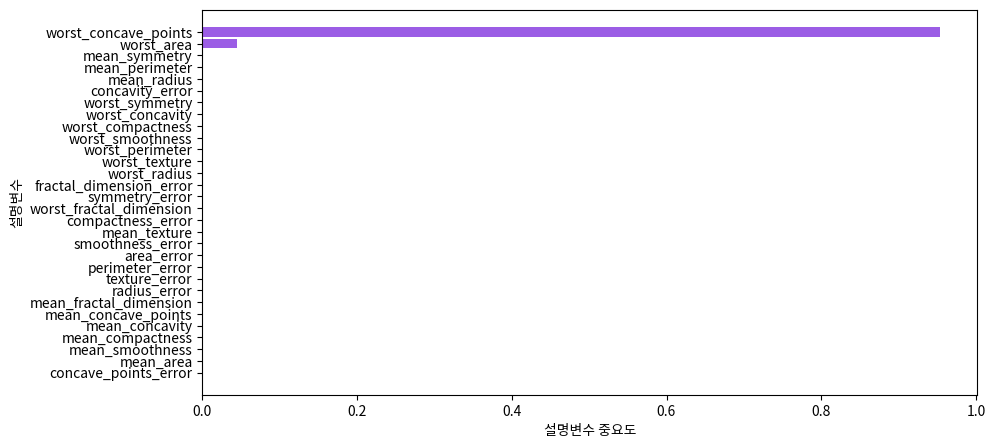

In [22]:
# 설명변수 중요도 그래프
# sort_values : 중요도가 높은 변수를 상위에 그림. 
df_importance.sort_values("Importance", ascending=True, inplace = True)
coordinates = range(len(df_importance))

plt.figure(figsize=(10,5))
plt.barh(y = coordinates, width = df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("설명변수 중요도")
plt.ylabel("설명변수")

## Grid Search

In [23]:
estimator = DecisionTreeClassifier()
# 구하고자 하는 parameter와 범위
param_grid = {"max_depth": para_depth, "min_samples_split": para_split,
              "min_samples_leaf": para_leaf}
# 정확도가 높은 최적 parameter 찾기
grid_dt = GridSearchCV(estimator, param_grid, scoring="accuracy", n_jobs = -1)
grid_dt.fit(df_train_x, df_train_y)

print("best estimator model: \n{}".format(grid_dt.best_estimator_))
print("\nbest parameter: \n{}".format(grid_dt.best_params_))
print("\nbest score: \n{}".format(grid_dt.best_score_.round(3)))

best estimator model: 
DecisionTreeClassifier(max_depth=1, min_samples_leaf=20, min_samples_split=10)

best parameter: 
{'max_depth': 1, 'min_samples_leaf': 20, 'min_samples_split': 10}

best score: 
0.89


In [24]:
tree_grid = DecisionTreeClassifier(max_depth=1, min_samples_split=40, min_samples_leaf=40, random_state=1234)
tree_grid.fit(df_train_x, df_train_y)

# 평가
y_pred = tree_grid.predict(df_test_x)
print("Accuracy: {0:.3f}\n".format(tree_grid.score(df_train_x, df_train_y)))
print("Accuracy: {0:.3f}\n".format(tree_grid.score(df_test_x, df_test_y)))

print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))

# 목표변수의 빈도 불균형 : f1 score로 모델 평가 
print(classification_report(df_test_y, y_pred, digits=3))

Accuracy: 0.932

Accuracy: 0.852

Confusion matrix: 
[[86 11]
 [ 8 23]]
              precision    recall  f1-score   support

           0      0.915     0.887     0.901        97
           1      0.676     0.742     0.708        31

    accuracy                          0.852       128
   macro avg      0.796     0.814     0.804       128
weighted avg      0.857     0.852     0.854       128

